<a href="https://colab.research.google.com/github/Rjmartir/Complete-Python-3-Bootcamp/blob/master/Netflixdataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Convert Data Types:
· Ensure that the ' date_added' column is in datetime format.
· Ensure that the ' release_year' column is in the correct numeric format.

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
print(df.dtypes)



show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


Create Additional Features:
· Extract month and year from the ' date_added' column for time-based analysis.

But before that I wanted to see how many missing entry in date_added.

In [11]:
df['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8807 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.9 KB


There are only 10 missing values for date_added. I want to fill it in with estimate value. Assuming that the added_date happens after 1 year of release_year.

In [12]:
# Filter rows with missing values in 'date_added'
missing_date_added = df['date_added'].isnull()

# Calculate estimated added date based on 'release_year' + 1 year
estimated_date_added = df.loc[missing_date_added, 'release_year'] + 1

# Update 'date_added' column with the estimated date
df.loc[missing_date_added, 'date_added'] = pd.to_datetime(estimated_date_added, format='%Y').dt.strftime('%Y-%m-%d')

# Display the updated DataFrame
print(df[['release_year', 'date_added']].head())


   release_year date_added
0          2020 2021-09-25
1          2021 2021-09-24
2          2021 2021-09-24
3          2021 2021-09-24
4          2021 2021-09-24


In [13]:
# Extract month and year from the 'date_added' column
df['added_month'] = df['date_added'].dt.month
df['added_year'] = df['date_added'].dt.year

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_month   8807 non-null   int64         
 13  added_year    8807 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 963.4+ KB


In [15]:
# Fill missing values in 'rating', 'duration', and 'country' columns
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_month   8807 non-null   int64         
 13  added_year    8807 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 963.4+ KB


In [17]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('netflix_data_processed.csv', index=False)

# Download the CSV file to your local machine (Mac)
files.download('netflix_data_processed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Split names in the "director" column by commas
unique_directors = df['director'].str.split(',')

# Stack the split names into separate rows
cleaned_director = unique_directors.explode()

# Clean and standardize names
cleaned_director = cleaned_director.str.strip().str.lower()

# Count occurrences of each unique name
director_counts = cleaned_director.value_counts()

# Create a DataFrame named director_counts_df
director_counts_df = pd.DataFrame({'Director': director_counts.index, 'Count': director_counts.values})

# Display the DataFrame
print(director_counts_df)


              Director  Count
0              unknown   2634
1        rajiv chilaka     22
2            jan suter     21
3          raúl campos     19
4          suhas kadav     16
...                ...    ...
4985      joe menendez      1
4986        eric bross      1
4987    will eisenberg      1
4988  marina seresesky      1
4989       mozez singh      1

[4990 rows x 2 columns]


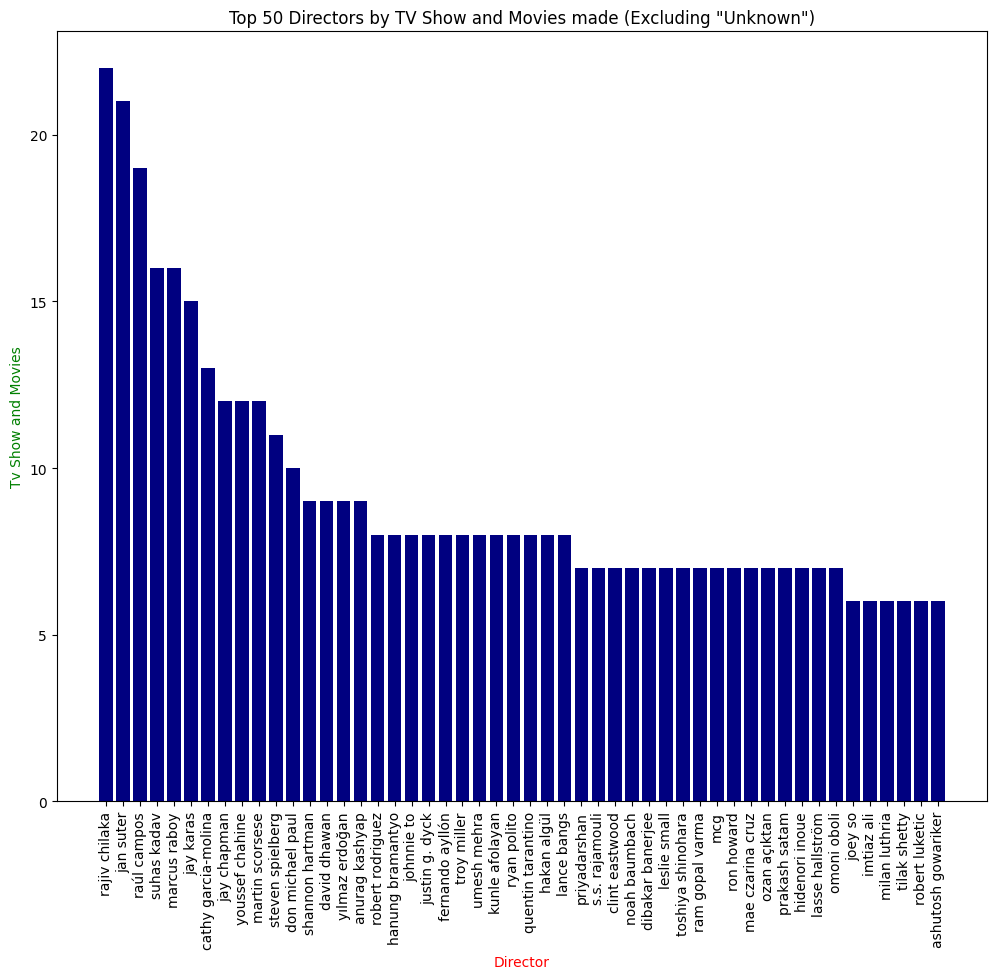

In [19]:
import matplotlib.pyplot as plt

# Exclude rows where the director is "Unknown"
director_counts_filtered = director_counts_df[director_counts_df['Director'] != 'unknown']

# Sort the filtered DataFrame by the 'Count' column in descending order
director_counts_filtered_sorted = director_counts_filtered.sort_values(by='Count', ascending=False)

# Get the top 50 directors
top_50_directors = director_counts_filtered_sorted.head(50)

# Plot the counts for each director
plt.figure(figsize=(12, 10))
plt.bar(top_50_directors['Director'], top_50_directors['Count'], color='navy')
plt.xlabel('Director', color='red')
plt.ylabel('Tv Show and Movies', color='green')
plt.title('Top 50 Directors by TV Show and Movies made (Excluding "Unknown")')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


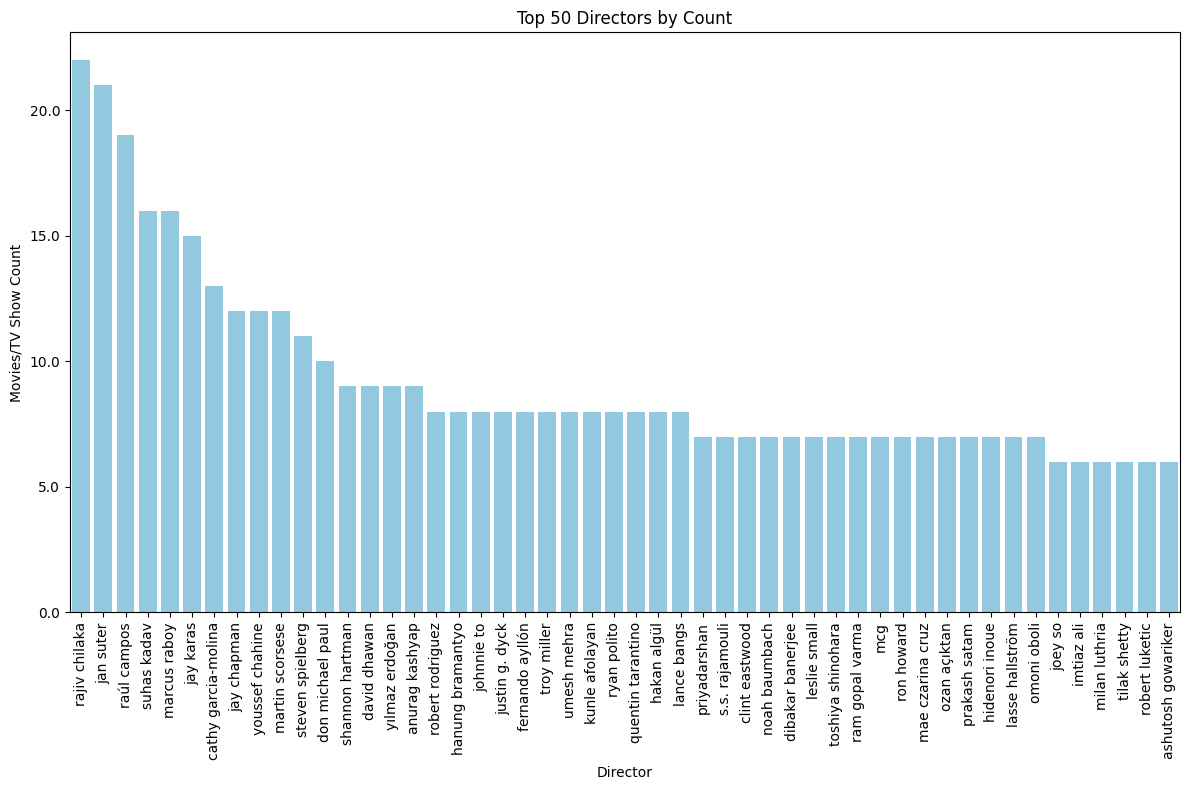

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Create a bar plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_50_directors, x='Director', y='Count', color='skyblue')

# Add hover tooltips using Matplotlib's FuncFormatter
def format_tooltip(y, pos):
    return f'{y}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_tooltip))

# Customize plot
plt.title('Top 50 Directors by Count')
plt.xlabel('Director')
plt.ylabel('Movies/TV Show Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()


In [21]:
import plotly.express as px

# Create a bar plot with Plotly
fig = px.bar(top_50_directors, x='Director', y='Count', color='Count',
             title='Top 50 Directors by Movies/TV Show made', labels={'Count': 'Movies/TV Show Count'})

# Add hover tooltips
fig.update_traces(hovertemplate='<b>%{x}</b><br>Count: %{y}')

# Customize layout
fig.update_layout(xaxis={'title': 'Director'}, yaxis={'title': 'Movies/TV Show Count'})
fig.update_xaxes(tickangle=90)

# Show plot
fig.show()


In [22]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool

# Output to notebook
output_notebook()

# Create a ColumnDataSource
source = ColumnDataSource(top_50_directors)

# Create a figure
p = figure(x_range=top_50_directors['Director'], sizing_mode="stretch_width", title="Top 50 Directors by Movies/TV Show made",
           toolbar_location=None, tools="")

# Add bars
p.vbar(x='Director', top='Count', width=0.9, source=source, line_color='white', fill_color='purple')

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Director", "@Director"), ("Count", "@Count")]
p.add_tools(hover)

# Customize plot
p.xaxis.major_label_orientation = 1.2
p.y_range.start = 0
p.xaxis.axis_label = "Director"
p.yaxis.axis_label = "Movies/TV Show Count"

# Show plot
show(p)


Working with cast column.

In [23]:
# Split names in the "cast" column by commas
cast_split = df['cast'].str.split(',')

# Stack the split names into separate rows
cleaned_cast = cast_split.explode()

# Clean and standardize names
cleaned_cast = cleaned_cast.str.strip().str.lower()

# Count occurrences of each unique name
cast_counts = cleaned_cast.value_counts()

# Create a DataFrame named cast_counts_df
cast_counts_df = pd.DataFrame({'Actor/Actress': cast_counts.index, 'Count': cast_counts.values})

# Display the DataFrame
print(cast_counts_df)


                 Actor/Actress  Count
0                      unknown    825
1                  anupam kher     43
2               shah rukh khan     35
3                julie tejwani     33
4             takahiro sakurai     32
...                        ...    ...
36424           melanie straub      1
36425  gabriela maria schmeide      1
36426            helena zengel      1
36427        daniel valenzuela      1
36428    chittaranjan tripathy      1

[36429 rows x 2 columns]


In [24]:
from google.colab import files
unique_cast_df = pd.DataFrame(cast_counts_df, columns=['Actor/Actress', 'Count'])
unique_cast_df.to_csv('unique_cast_members.csv', index=False)

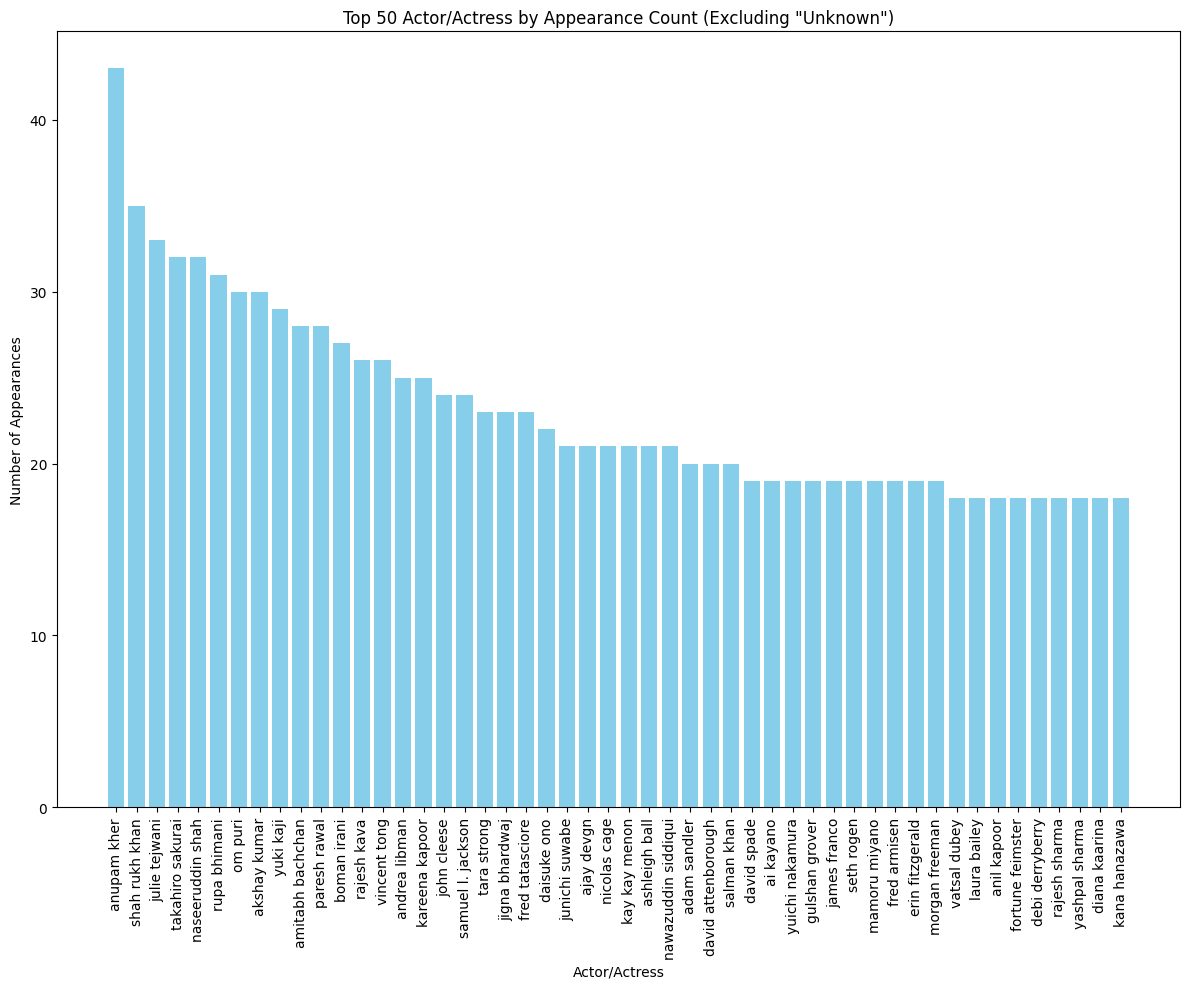

In [25]:
import matplotlib.pyplot as plt

# Filter out the 'Unknown' category
filtered_cast = cast_counts_df[cast_counts_df['Actor/Actress'] != 'unknown']

# Sort the filtered DataFrame by count in descending order
top_50 = filtered_cast.nlargest(50, 'Count')

# Plot the top 50 actors/actresses
plt.figure(figsize=(12, 10))
plt.bar(top_50['Actor/Actress'], top_50['Count'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Actor/Actress')
plt.ylabel('Number of Appearances')
plt.title('Top 50 Actor/Actress by Appearance Count (Excluding "Unknown")')
plt.tight_layout()
plt.show()

In [26]:
import plotly.express as px

# Filter out the 'unknown' category
filtered_cast = cast_counts_df[cast_counts_df['Actor/Actress'] != 'unknown']

# Sort the filtered DataFrame by count in descending order
top_50 = filtered_cast.nlargest(50, 'Count')

# Create a bar plot with Plotly
fig = px.bar(top_50, x='Actor/Actress', y='Count', color='Count',
             title='Top 50 Actor/Actress by Appearance Count',
             labels={'Count': 'Appearance Count'})

# Add hover tooltips
fig.update_traces(hovertemplate='<b>%{x}</b><br>Appearance Count: %{y}')

# Customize layout
fig.update_layout(xaxis={'title': 'Actor/Actress'}, yaxis={'title': 'Appearance Count'})
fig.update_xaxes(tickangle=90)

# Show plot
fig.show()


Cast/Director Colab

In [27]:
# Combine the 'cast' and 'director' columns into a new DataFrame
cast_director_pairs = df[['cast', 'director']].copy()

# Split names in the "cast" column by commas
cast_director_pairs.loc[:, 'cast'] = cast_director_pairs['cast'].str.split(',')

# Stack the split names into separate rows
cast_director_pairs = cast_director_pairs.explode('cast')

# Clean and standardize names
cast_director_pairs.loc[:, 'cast'] = cast_director_pairs['cast'].str.strip().str.lower()
cast_director_pairs.loc[:, 'director'] = cast_director_pairs['director'].str.strip().str.lower()

# Group by unique pairs of cast and director, then count occurrences
cast_director_counts = cast_director_pairs.groupby(['cast', 'director']).size().reset_index(name='count')

# Display the new DataFrame
print(cast_director_counts)


                        cast                     director  count
0      "riley" lakdhar dridi            rebecca zlotowski      1
1               'najite dede                 aniedi anwah      1
2               'najite dede                      unknown      1
3                   2 chainz                      unknown      1
4                       2mex                 ava duvernay      1
...                      ...                          ...    ...
57521       şinasi yurtsever  selçuk aydemir, birkan pusa      1
57522           şükran ovalı               yılmaz erdoğan      1
57523         şükrü özyıldız                      unknown      1
57524         şükrü özyıldız               yılmaz erdoğan      1
57525           ṣọpẹ́ dìrísù                  remi weekes      1

[57526 rows x 3 columns]


In [28]:
from google.colab import files

# Save the DataFrame to a CSV file
cast_director_counts.to_csv('cast_director_counts.csv', index=False)

# Download the CSV file to your local machine (Mac)
files.download('cast_director_counts.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Filter out rows where either 'cast' or 'director' is 'unknown'
cast_director_counts_filtered = cast_director_counts[(cast_director_counts['cast'] != 'unknown') & (cast_director_counts['director'] != 'unknown')]

# Display the filtered DataFrame
print(cast_director_counts_filtered)


                        cast                     director  count
0      "riley" lakdhar dridi            rebecca zlotowski      1
1               'najite dede                 aniedi anwah      1
4                       2mex                 ava duvernay      1
6                    50 cent              brian a. miller      1
7                    50 cent           christian gudegast      1
...                      ...                          ...    ...
57520       şinasi yurtsever               selçuk aydemir      1
57521       şinasi yurtsever  selçuk aydemir, birkan pusa      1
57522           şükran ovalı               yılmaz erdoğan      1
57524         şükrü özyıldız               yılmaz erdoğan      1
57525           ṣọpẹ́ dìrísù                  remi weekes      1

[43089 rows x 3 columns]


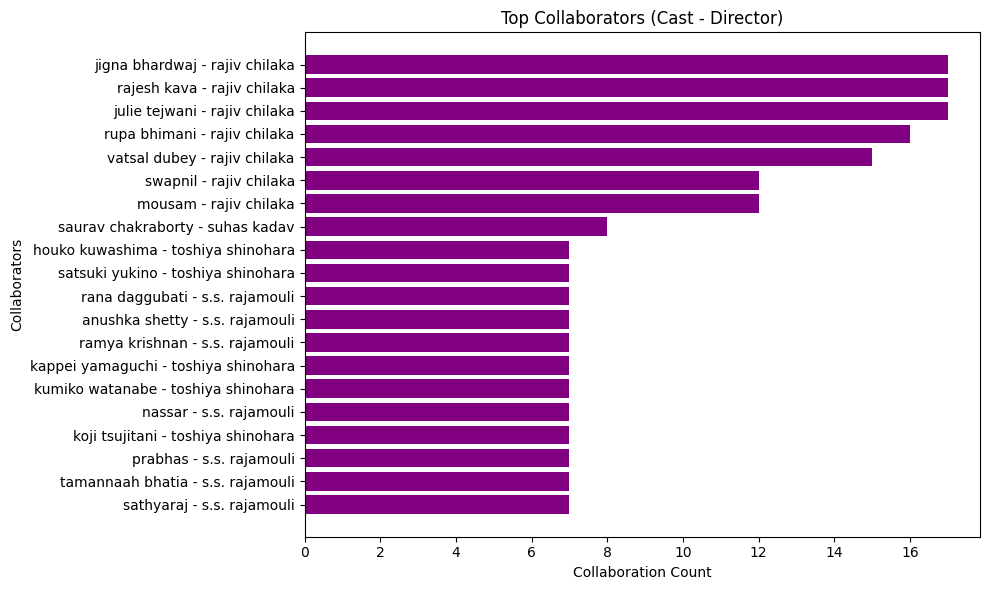

In [32]:

# Sort the DataFrame by count in descending order
top_collaborators = cast_director_counts_filtered.sort_values(by='count', ascending=False).head(20)

# Plot the top collaborators
plt.figure(figsize=(10, 6))
plt.barh(top_collaborators['cast'] + ' - ' + top_collaborators['director'], top_collaborators['count'], color='purple')
plt.xlabel('Collaboration Count')
plt.ylabel('Collaborators')
plt.title('Top Collaborators (Cast - Director)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.tight_layout()
plt.show()


<ipython-input-34-fbc6ef017738>:17: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



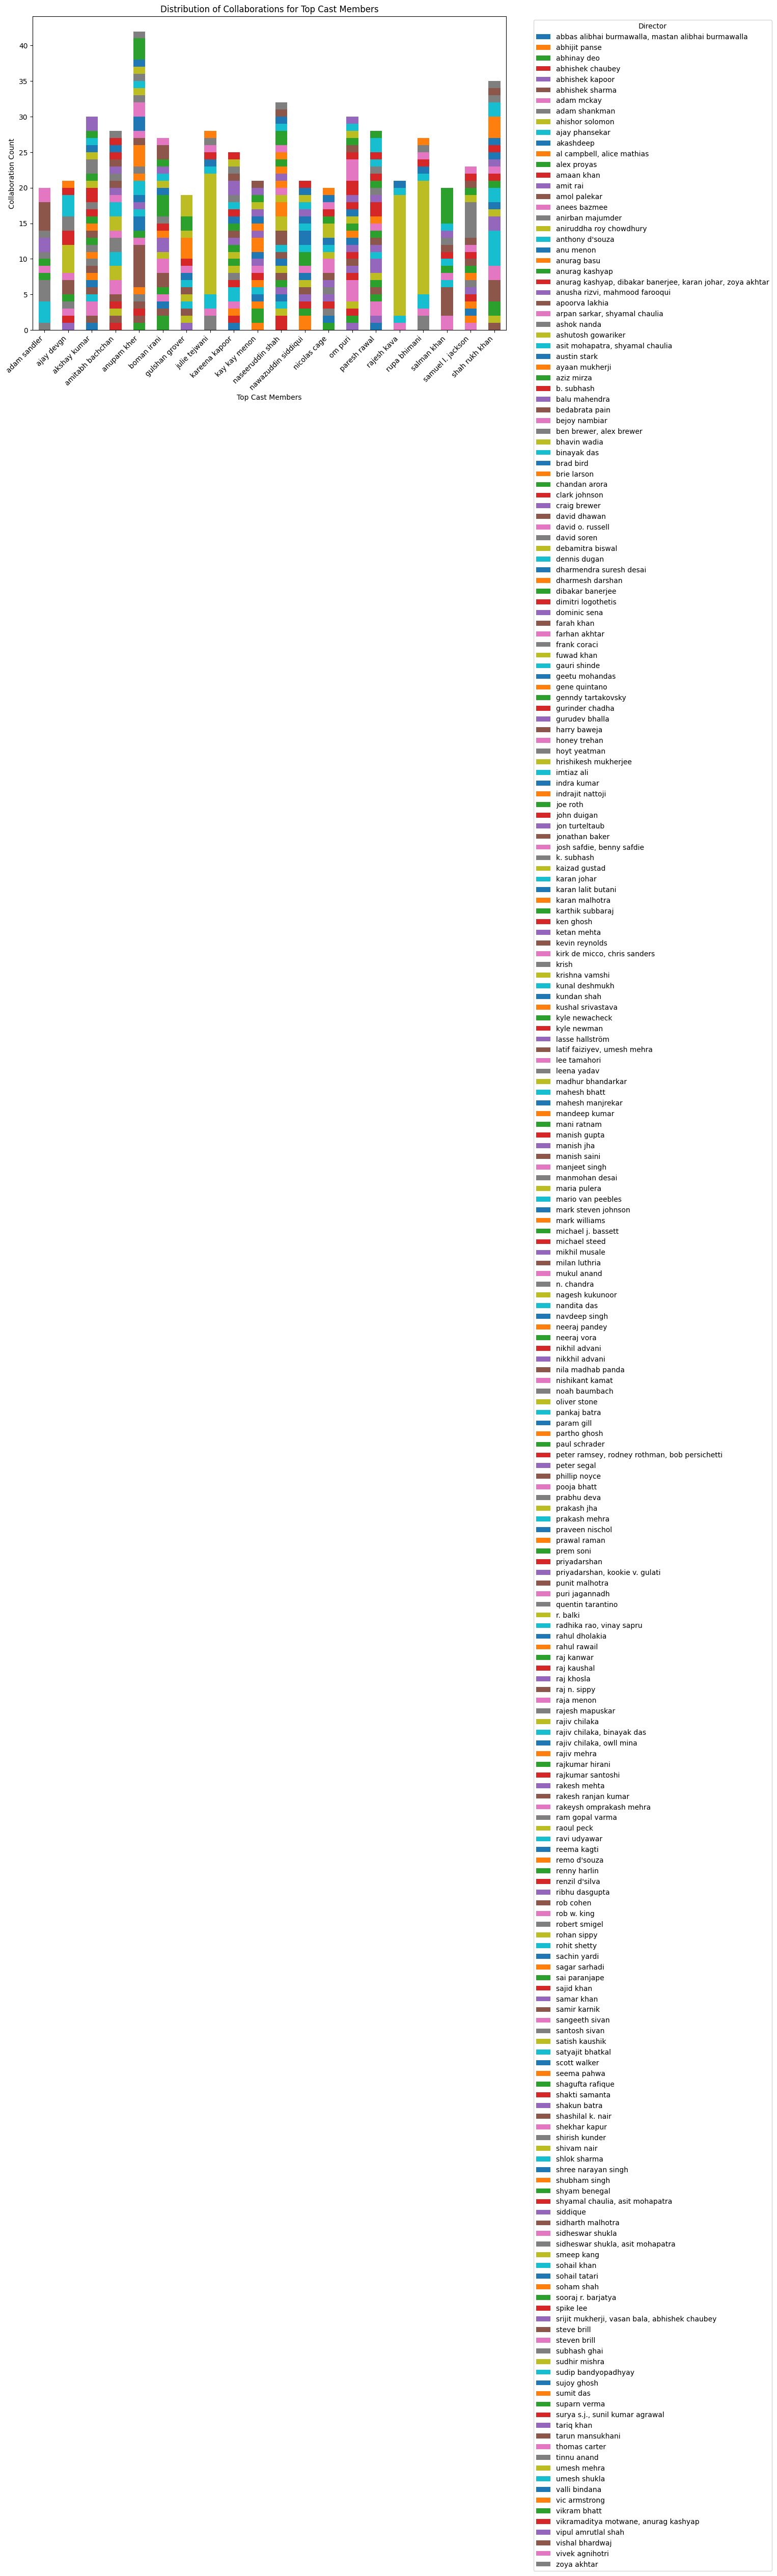

In [34]:
# Filter the DataFrame to get the top N cast members with the highest number of collaborations
top_cast_members = cast_director_counts_filtered.groupby('cast')['count'].sum().nlargest(20).index

# Filter the DataFrame to include only the top cast members
top_cast_collaborations = cast_director_counts_filtered[cast_director_counts_filtered['cast'].isin(top_cast_members)]

# Pivot the DataFrame to create a matrix of collaborations
pivot_table = top_cast_collaborations.pivot(index='cast', columns='director', values='count').fillna(0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Top Cast Members')
plt.ylabel('Collaboration Count')
plt.title('Distribution of Collaborations for Top Cast Members')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

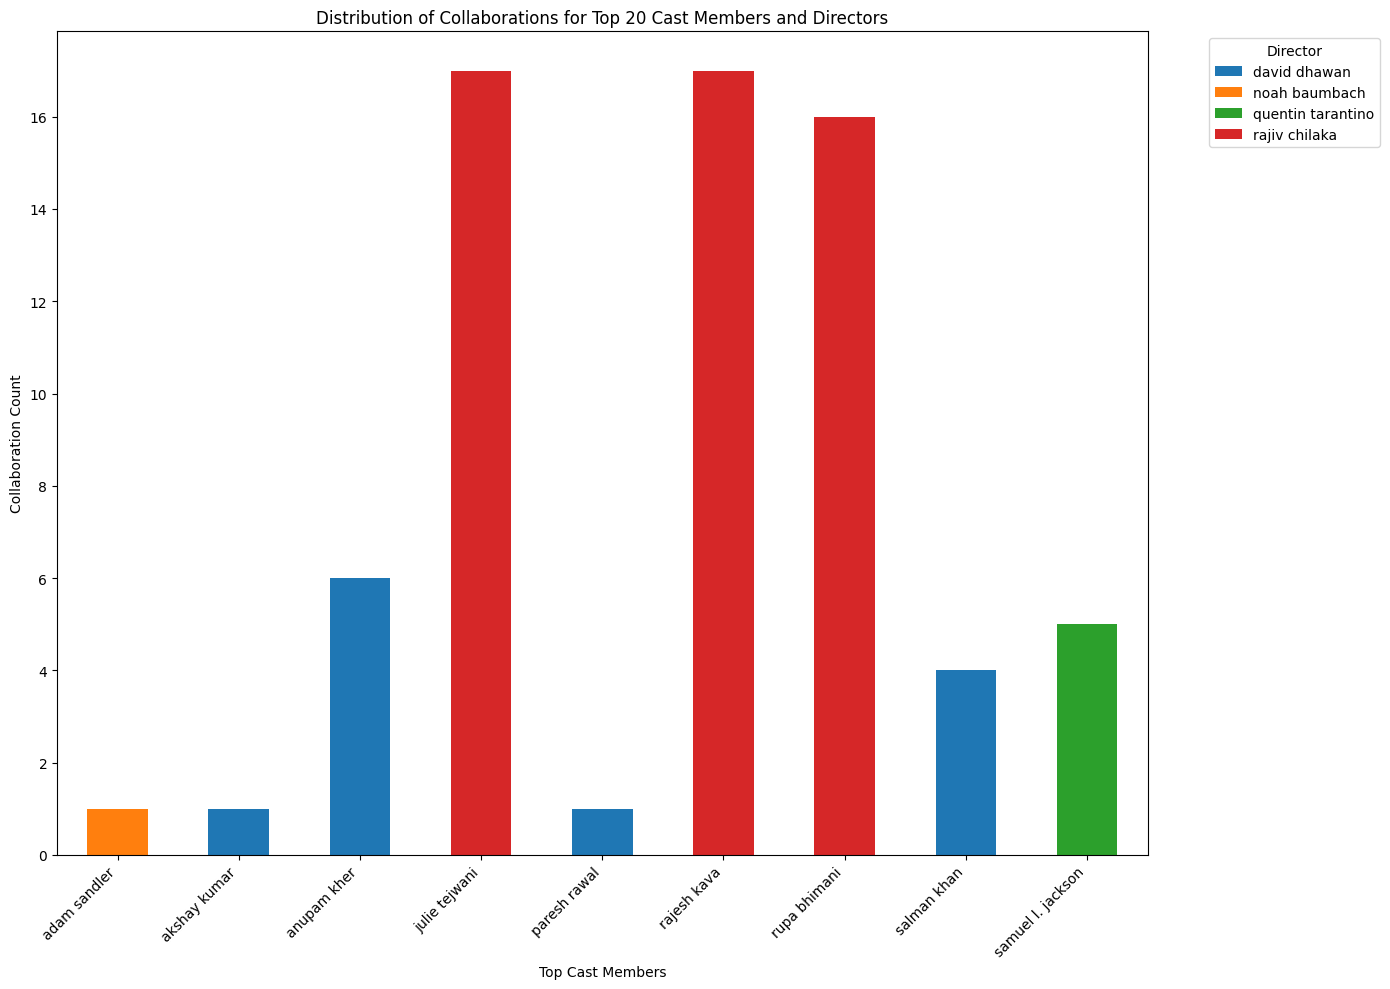

In [35]:
# Get the top 20 cast members with the highest number of collaborations
top_20_cast = cast_director_counts_filtered.groupby('cast')['count'].sum().nlargest(20).index

# Get the top 20 directors with the highest number of collaborations
top_20_directors = cast_director_counts_filtered.groupby('director')['count'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 cast members and directors
top_collaborations = cast_director_counts_filtered[
    (cast_director_counts_filtered['cast'].isin(top_20_cast)) &
    (cast_director_counts_filtered['director'].isin(top_20_directors))
]

# Pivot the DataFrame to create a matrix of collaborations
pivot_table = top_collaborations.pivot(index='cast', columns='director', values='count').fillna(0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.xlabel('Top Cast Members')
plt.ylabel('Collaboration Count')
plt.title('Distribution of Collaborations for Top 20 Cast Members and Directors')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()